In [43]:
#Import a plotting libraries and a maths library 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

r = np.linspace(0.01,3.0,num=500) # Make a radius vector
epsilon = 1 # Energy minimum
sigma = 0.5 # Distance to zero crossing point
E_LJ = 4*epsilon*((sigma/r)**12-(sigma/r)**6) # Lennard-Jones potential


In [197]:
def Compute_Forces(pos,acc,epsilon,BoxSize,DIM,N):
    Sij = np.zeros(DIM)
    Rij = np.zeros(DIM)
    acc = np.zeros([N,DIM])
    for i in range(N-1):
        for j in range(i+1,N):
            Sij = pos[i,:]-pos[j,:]
            
            for l in range(DIM):
                if (np.abs(Sij[l])>0.5):
                    Sij[l] = Sij[l]-np.copysign(1,Sij[l])
            
            Rij = BoxSize*Sij
            
            Rsqij = np.dot(Rij,Rij)
            
            if (Rsqij<Rcutoff**2):
                r2 = 1/Rsqij
                r6 = r2**3
                r12 = r6**2
                dphi = epsilon*24*r2*(2*r12-r6)#
                acc[i,:] = acc[i,:]+dphi*Sij
                acc[j,:] = acc[j,:]-dphi*Sij#
    
    return acc
            
            
            

In [289]:
DIM = 2
N = 12
epsilon = 1e-13
BoxSize = 1
Rcutoff = 2.5


vol = BoxSize**DIM
pos = np.random.rand(N,DIM)*BoxSize

In [290]:
pos[:,0]

array([0.50901115, 0.75321828, 0.01395172, 0.14493281, 0.32497437,
       0.80943946, 0.56382836, 0.12833666, 0.146504  , 0.24567586,
       0.43956638, 0.58212525])

In [325]:
Nsteps = 400
dt = 1/400

def main(pos,Nsteps,dt,epsilon,BoxSize,DIM):
    fig = plt.figure(figsize = (4,4), dpi=150)
    ims = [None for i in range(Nsteps)]
    vel = (np.random.randn(N,DIM)-0.5)
    acc = (np.zeros([N,DIM]))
    E = np.zeros(Nsteps)
    for k in range(Nsteps):
        #for i in range(DIM):
         #   period = np.where(pos[:,i] > 0.5)
          #  pos[period,i]=pos[period,i]-1.0
           # period = np.where(pos[:,i] < -0.5)
            #pos[period,i]=pos[period,i]+1.0
            
        pos = (pos + dt*vel + 0.5*dt**2*acc)%BoxSize
        
        vel = vel +1/2*dt*acc
        
        acc = Compute_Forces(pos,acc,epsilon,BoxSize,DIM,N)
        
        vel = vel + 1/2*dt*acc
        
        im = [plt.scatter(pos[:,0],pos[:,1],color='b') ]
        ims[k] = im
        E[k] = 1/2*sum([sum(vel[i,:]**2) for i in range(N)])
    plt.grid()
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title("Molecular Dynamics")
    plt.rcParams["animation.html"]= 'html5'
    ani = animation.ArtistAnimation(fig,ims,interval = 50)
    plt.close
    
    return ani,E
    
        
        

In [326]:
from matplotlib import cm
from matplotlib import animation

C:\Users\Brian Hennessy\AppData\Local\Temp\ipykernel_13020\1920563629.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  r2 = 1/Rsqij
C:\Users\Brian Hennessy\AppData\Local\Temp\ipykernel_13020\1920563629.py:21: RuntimeWarning: invalid value encountered in double_scalars
  dphi = epsilon*24*r2*(2*r12-r6)#
C:\Users\Brian Hennessy\AppData\Local\Temp\ipykernel_13020\2002277223.py:17: RuntimeWarning: invalid value encountered in remainder
  pos = (pos + dt*vel + 0.5*dt**2*acc)%BoxSize


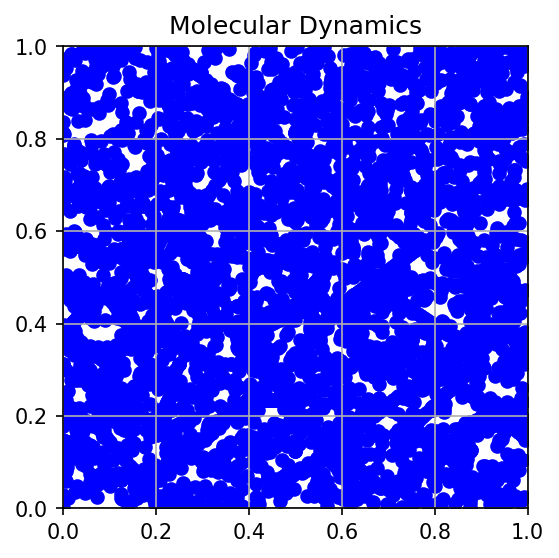

In [335]:
a = main(pos,Nsteps,dt,epsilon,BoxSize,DIM)

In [336]:
a[0]

Text(0.5, 1.0, 'Kinetic energy vs iteration.')

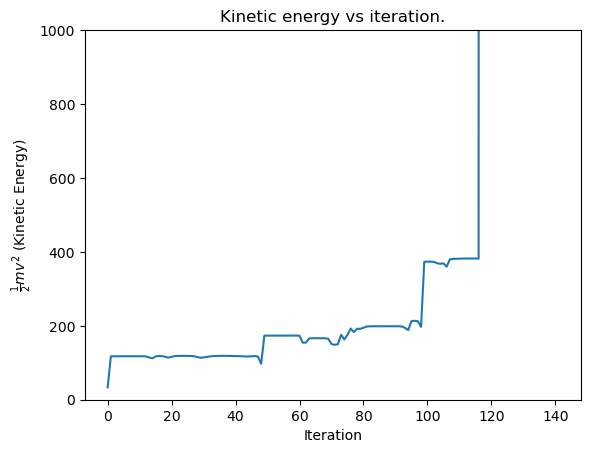

In [347]:
plt.plot(a[1])
#plt.xlim([0,150])
plt.ylim([0,1000])
plt.xlabel("Iteration")
plt.ylabel(r"$\frac{1}{2}mv^2$ (Kinetic Energy)")
plt.title("Kinetic energy vs iteration.")

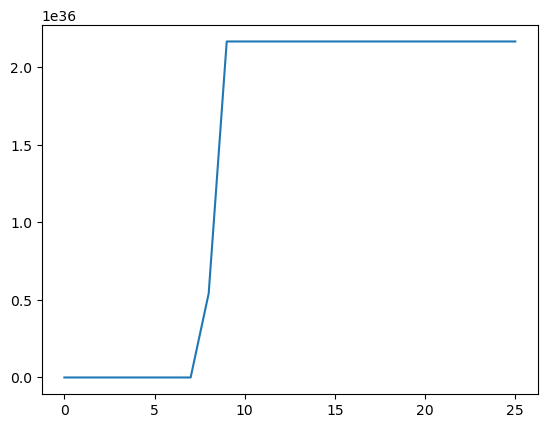

In [288]:
plt.plot(a[1])

In [ ]:
fig = plt.figure(figsize = (4,4), dpi=150)
ims = [None for i in range(1000)]
#plt.plot(x_plot,rho_inf_vals,color='r')
for a in range(1000):
    
    im = [plt.scatter(pos_save[:,:,a][:,0],pos_save[:,:,a][:,1],color='b') ]
    
    ims[a] = im
plt.grid()
plt.title("Evolution of SDE dynamics and equilibrium solution, $\gamma$=1")
plt.rcParams["animation.html"]= 'html5'
ani = animation.ArtistAnimation(fig,ims,interval = 100)
plt.close()

In [ ]:
pos[1,:]-pos[2,:]

In [ ]:
Sij[1]-np.copysign(1,Sij[1])